In [1]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Twitter API Keys
from TweetbotmeowAPI import api_key, api_secret, access_token, access_token_secret

#Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#  Specify your twitter account (hint: remember the "@" sign)
myacct = "@nanameowbanana"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Create a function to find people mention about my twitter and another person's twitter in a format "@myaccount: @targetaccount"
# and grab 500 compound sentiments from every tweet
# and create the plot and tweet it back

# before that set a value to store the last id or each data grab
lastid = [0]


# recent tweet
def tweetsentimentanalysis():
    # set a counter of retweet 
    counter = 0
    
    # Get all tweets that mention me and another twitter user
    mtweets = api.search(myacct,result_type="recent", since_id= max(lastid))

    # Loop through all public_tweets
    for tweet in mtweets["statuses"]:
        target = tweet["entities"]['user_mentions'][1]['screen_name']
        respname = tweet['user']['screen_name']
        lastid.append(tweet['id'])

        # Variables for holding sentiments
        sentiments = []
        #tweetcounter
        num = 1
        # Add List to hold 500 sentiment
        for x in range(25):
        # Get all tweets from home feed
            public_tweets = api.user_timeline(target)
        # Loop through all tweets 
            for tweet in public_tweets:    
            # Run Vader Analysis on each tweet
                compound = analyzer.polarity_scores(tweet["text"])["compound"]
                pos = analyzer.polarity_scores(tweet["text"])["pos"]
                neu = analyzer.polarity_scores(tweet["text"])["neu"]
                neg = analyzer.polarity_scores(tweet["text"])["neg"]
                tweets_ago = num
            
            # Add sentiments for each tweet into an array
                sentiments.append({"Date": tweet["created_at"], 
                                   "Sentiment Score": compound,
                                   "Positive": pos,
                                   "Negative": neu,
                                   "Neutral": neg,
                                   "Tweets Ago": num})
            # Add to counter 
                num = num + 1
        # Convert sentiments to DataFrame
        sentiments_pd = pd.DataFrame.from_dict(sentiments)
        sentiments_pd.head()

        # Create plot
        sns.set_style("darkgrid") 
        fig, ax = plt.subplots(figsize=(10, 7))

        plt.plot(np.arange(-len(sentiments_pd["Sentiment Score"]),0),sentiments_pd["Sentiment Score"], marker="o", linewidth=0.5,alpha=0.8)

        #Incorporate the other graph properties
        T = time.strftime("%m%d%y")
        plt.title(f"Sentiment Analysis of Tweets {T} for @{target}")
        plt.legend(title=f"@ {target} Tweets",bbox_to_anchor=(1.2, 0.5),loc=1,fontsize=10,frameon=True)
        plt.ylabel("Tweet Polarity")
        plt.xlabel("Tweets Ago")
        plt.ylim(-1,1)
        plt.savefig(f"Sentiment Analysis for {target} {T}.png")
        plt.show()
        
        #Tweet back the result
        api.update_with_media(f"Sentiment Analysis for {target} {T}.png",f"New Tweet Analysis: @{target} (Many Thx @{respname})")
        
        counter = counter + 1
    print(f"last tweet id is {max(lastid)}")
    print(f"we split out {counter} times analysis this time")


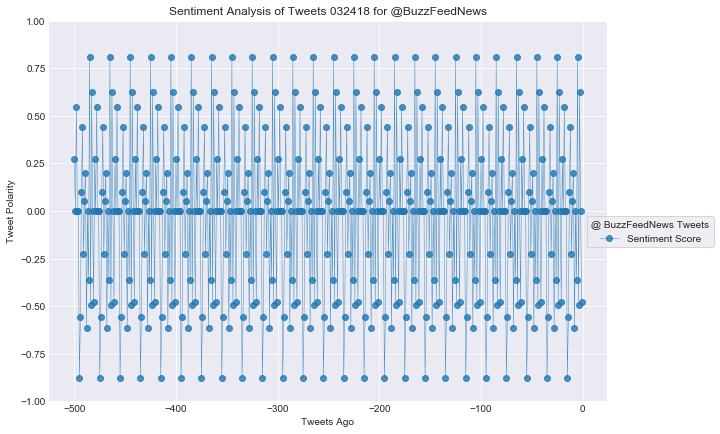

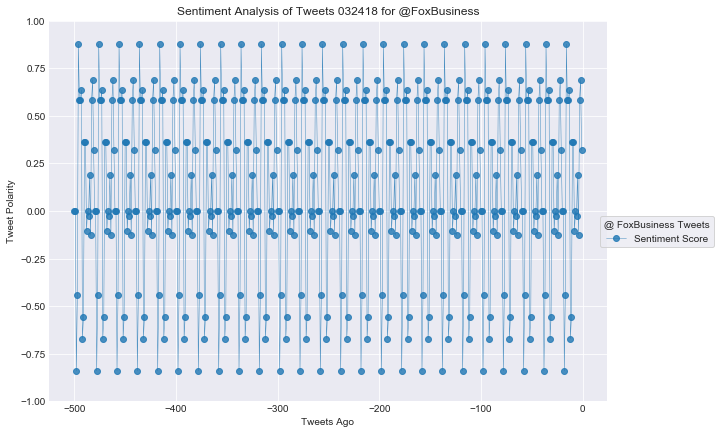

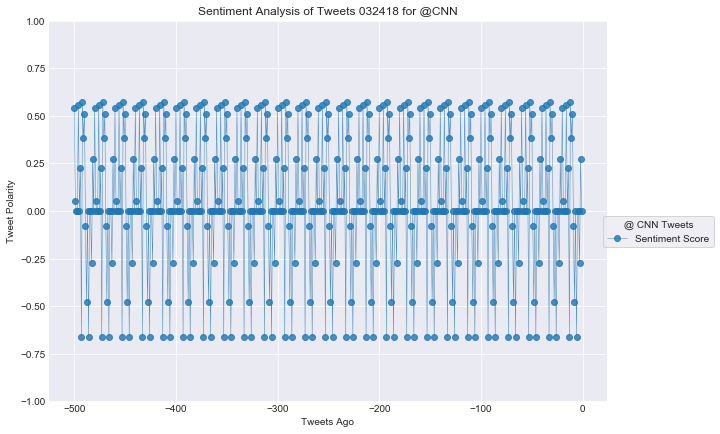

last tweet id is 977485662126403586
we split out 3 times analysis this time


In [ ]:
# Set timer to run every 5 minute
while(True):
    tweetsentimentanalysis()
    time.sleep(300)
    